                  Detecting Malaria cells using Convolutional Neural Network

# Importing Libraries

In [1]:
import  os
from keras.preprocessing.image import ImageDataGenerator, array_to_img,img_to_array,load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import cvutils
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import keras
from keras.utils import plot_model
from keras.layers import BatchNormalization
from pathlib import Path
from keras.preprocessing import image
from keras.models import model_from_json

Using TensorFlow backend.


# Loading Image Dataset

In [2]:
data    = []
labels  = []
Parasitized  = os.listdir("cell_images/Parasitized/")
Uninfected   = os.listdir("cell_images/Uninfected/")

In [3]:
for i in Parasitized:
    if i != "Thumbs.db":
        image = cv2.imread("cell_images/Parasitized/" + i)
        size_image = cv2.resize(image, (50, 50))
        data.append(np.array(size_image))
        labels.append(1)
for j in Uninfected:
    if j != "Thumbs.db":
        image = cv2.imread("cell_images/Uninfected/" + j)
        size_image = cv2.resize(image, (50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    

In [4]:
print(len(data))
print(len(labels))

27558
27558


# Sample Data visualization

In [5]:
cells = np.array(data)
labels = np.array(labels)

np.save('Cells' , cells)
np.save('Labels' , labels)

idx = np.arange(cells.shape[0])
np.random.shuffle(idx)
cells = cells[idx]
labels = labels[idx]

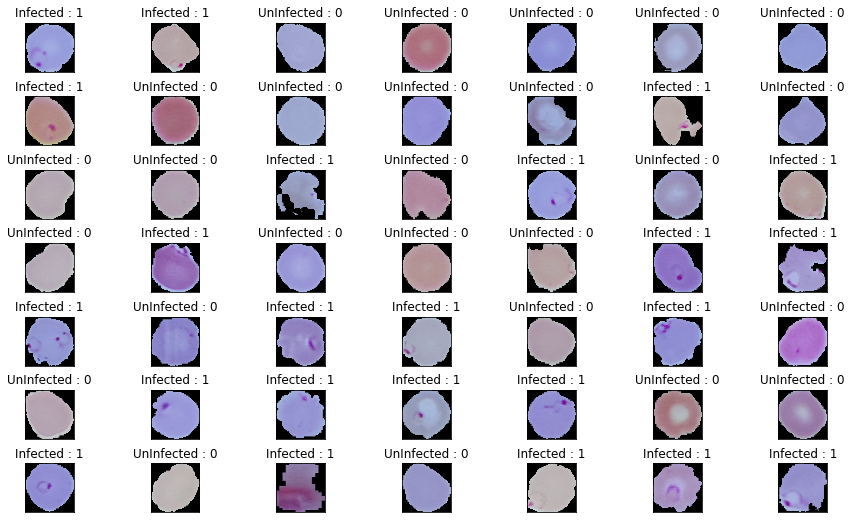

In [6]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , cells.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(cells[r[0]])
    plt.title('{} : {}'.format('Infected' if labels[r[0]] == 1 else 'UnInfected' ,
                               labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

# Normalize data set

In [7]:
# split data to 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split(cells, labels, test_size = 0.2, random_state = 101) 
#split train data into validation data and train (70% train, 10% validation, 20% test)
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_val   = x_val.astype('float32')
x_train/255
x_test/255
x_val/255

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [8]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train,2)
y_test  = keras.utils.to_categorical(y_test,2)
y_val  = keras.utils.to_categorical(y_val,2)

# Create a model and add layers

In [9]:

model = Sequential()

In [10]:
model.add(Conv2D(32,kernel_size = (3,3),padding = 'same',input_shape = (50,50,3),activation = "relu"))
#model.add(Conv2D(32,kernel_size = (3,3),activation = "relu")) #k
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization(axis = -1))
#model.add(Dropout(0.25))  # activated now


model.add(Conv2D(64,kernel_size = (3,3),padding = 'same',activation = "relu"))
#model.add(Conv2D(64,kernel_size = (3,3),activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization(axis = -1))
#model.add(Dropout(0.25)) 


#model.add(Conv2D(64,kernel_size = (3,3),padding = 'same',activation = "relu"))
#model.add(Conv2D(64,kernel_size = (3,3),activation = "relu"))
#model.add(MaxPooling2D(pool_size = (2,2)))
#model.add(BatchNormalization(axis = -1))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(110, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(2,activation = "softmax"))


# Print a summary of the model
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 25, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
flat

# Compile the model

In [11]:
model.compile(
                loss= 'categorical_crossentropy',
                optimizer= "adam",
                metrics= ['accuracy']
             )

# Train the model

In [12]:
hist = model.fit(
            x_train,
            y_train,
            batch_size= 50,
            epochs= 10,
            validation_data= (x_val,y_val),
            shuffle= True
         )

Instructions for updating:
Use tf.cast instead.
Train on 17636 samples, validate on 4410 samples
Epoch 1/10
17636/17636 [==============================] - 66s 4ms/step - loss: 0.5644 - acc: 0.7380 - val_loss: 1.2362 - val_acc: 0.5565
Epoch 2/10
17636/17636 [==============================] - 63s 4ms/step - loss: 0.2379 - acc: 0.9103 - val_loss: 0.2778 - val_acc: 0.9016
Epoch 3/10
17636/17636 [==============================] - 63s 4ms/step - loss: 0.1552 - acc: 0.9441 - val_loss: 0.2921 - val_acc: 0.9018
Epoch 4/10
17636/17636 [==============================] - 63s 4ms/step - loss: 0.1292 - acc: 0.9555 - val_loss: 0.1610 - val_acc: 0.9451
Epoch 5/10
17636/17636 [==============================] - 64s 4ms/step - loss: 0.1123 - acc: 0.9602 - val_loss: 0.1590 - val_acc: 0.9454
Epoch 6/10
17636/17636 [==============================] - 64s 4ms/step - loss: 0.0941 - acc: 0.9664 - val_loss: 0.1825 - val_acc: 0.9363
Epoch 7/10
17636/17636 [==============================] - 62s 3ms/step - loss: 0.

In [13]:
import pandas as pd
acc = pd.DataFrame.from_dict(hist.history)
acc = pd.concat([pd.Series(range(0,30),name='epochs'),acc],axis=1)
acc.head()

,epochs,val_loss,val_acc,loss,acc
0,0,1.236158,0.556463,0.564371,0.738036
1,1,0.277833,0.901587,0.237854,0.910297
2,2,0.292145,0.901814,0.155227,0.944092
3,3,0.161042,0.945125,0.129180,0.955489
4,4,0.158968,0.945351,0.112299,0.960195


# Plot Model Accuracy

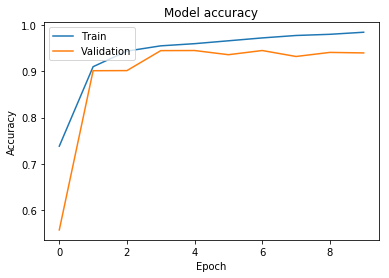

In [14]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Save neural network structure

In [15]:
model_Struct = model.to_json()
file_name = Path("model_structure.json")
file_name.write_text(model_Struct)

3813

# Save neural network's trained weights

In [16]:
model.save_weights("model_weights.h5",overwrite= True)

# Predictions

In [42]:
predict = model.predict(x_test)

In [43]:

#predict = np.argmax(predict, axis=1)
print(predict)

[[1.3575847e-07 9.9999988e-01]
 [9.9997747e-01 2.2472675e-05]
 [9.4301713e-01 5.6982867e-02]
 ...
 [9.9995160e-01 4.8342645e-05]
 [9.9926156e-01 7.3848380e-04]
 [1.7391256e-04 9.9982613e-01]]


In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [45]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

In [51]:
#!pip install mlxtend

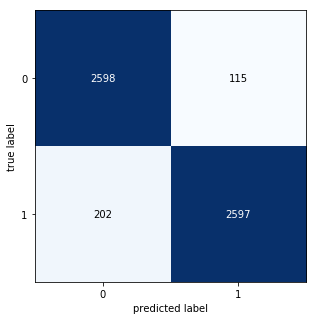

In [48]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [57]:
# Recall = TP / TP +FN

Recall=2598/(2598+202)
Recall

0.9278571428571428

In [58]:
# Precision = TP/TP + FP
Precision = 2598/(2598+115)
Precision

0.9576115001842979

In [60]:
# F -Measure

FMeasure = (2 * Recall * Precision)/(Recall + Precision)
FMeasure

0.9424995465263922

# Validating Model prediction

* Validating the model by passing single image

This is image is a Infected - Likelihood: 1.000000


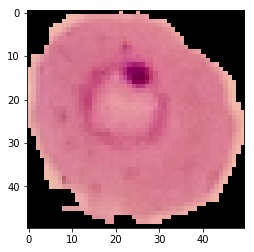

In [61]:
class_labels = ["Uninfected","Infected"]
from keras.preprocessing import image
img = image.load_img("cell_images/Parasitized/C37BP2_thinF_IMG_20150620_131423a_cell_92.png", target_size=(50, 50))
#img = image.load_img("cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_123.png", target_size=(50, 50))
image_to_test = image.img_to_array(img)
list_of_images = np.expand_dims(image_to_test, axis=0)
results = model.predict(list_of_images)
single_result = results[0]
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]
class_label = class_labels[most_likely_class_index]
img
print("This is image is a {} - Likelihood: {:2f}".format(class_label, class_likelihood))
plt.imshow(img)
plt.show()

# Validate model by loading model structure & weights

This is image is a Infected - Likelihood: 0.999623


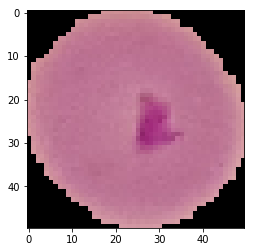

In [62]:
class_labels = ["Uninfected","Infected"]

# Load the json file that contains the model's structure
f = Path("model_Structure.json")
model_Structure_load = f.read_text()

# Recreate the Keras model object from the json data
model_load = model_from_json(model_Structure_load)

# Re-load the model's trained weights
model_load.load_weights("model_weights.h5")

# Load an image file to test, resizing it to 32x32 pixels (as required by this model)
img = image.load_img("cell_images/Parasitized/C38P3thinF_original_IMG_20150621_112116_cell_204.png", target_size = (50,50))
#img = image.load_img("cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_123.png", target_size = (50,50))
# Convert the image to a numpy array
img_to_test = image.img_to_array(img)

# Add a fourth dimension to the image (since Keras expects a list of images, not a single image)
list_of_images = np.expand_dims(img_to_test,axis= 0)

# Make a prediction using the model
results = model_load.predict(list_of_images)

# Since we are only testing one image, we only need to check the first result
single_result = results[0]

most_likely_class_indx = int(np.argmax(single_result))
class_likhood = single_result[most_likely_class_indx]


# Get the name of the most likely class
class_label = class_labels[most_likely_class_indx]

# Print the result

print("This is image is a {} - Likelihood: {:2f}".format(class_label, class_likhood))
plt.imshow(img)
plt.show()

# Transfer Learning VGG16

In [63]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np
from keras.applications import vgg16
from keras import applications
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from keras.models import Model
import keras

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers



In [64]:
model = applications.VGG16(include_top= False, weights= 'imagenet')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

# Load VGG16 & Flatten

In [65]:

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=(50,50,3))

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

# Extract features for Trained images

In [66]:
def get_features_vgg(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features


train_imgs_scaled =  x_train
validation_imgs_scaled = x_val

train_features_vgg = get_features_vgg(vgg_model, train_imgs_scaled)
validation_features_vgg = get_features_vgg(vgg_model, validation_imgs_scaled)

print('Train VGG Features:', train_features_vgg.shape, 
      '\tValidation VGG Features:', validation_features_vgg.shape)

Train VGG Features: (17636, 512) 	Validation VGG Features: (4410, 512)


# Add Layers and Train with features

In [67]:


input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 1026      
Total params: 526,338
Train

# Train the Model

In [68]:
history = model.fit(x=train_features_vgg, y=y_train,
                    validation_data=(validation_features_vgg, y_val),
                    batch_size=50,
                    epochs=10,
                    verbose=1)

Train on 17636 samples, validate on 4410 samples
Epoch 1/10
17636/17636 [==============================] - 2s 140us/step - loss: 0.7948 - acc: 0.8293 - val_loss: 0.3536 - val_acc: 0.8950
Epoch 2/10
17636/17636 [==============================] - 2s 111us/step - loss: 0.4074 - acc: 0.8744 - val_loss: 0.2697 - val_acc: 0.9002
Epoch 3/10
17636/17636 [==============================] - 2s 110us/step - loss: 0.3039 - acc: 0.8884 - val_loss: 0.2509 - val_acc: 0.9053
Epoch 4/10
17636/17636 [==============================] - 2s 113us/step - loss: 0.2589 - acc: 0.9005 - val_loss: 0.2390 - val_acc: 0.9107
Epoch 5/10
17636/17636 [==============================] - 2s 108us/step - loss: 0.2434 - acc: 0.9077 - val_loss: 0.2349 - val_acc: 0.9145
Epoch 6/10
17636/17636 [==============================] - 2s 107us/step - loss: 0.2269 - acc: 0.9138 - val_loss: 0.2430 - val_acc: 0.9101
Epoch 7/10
17636/17636 [==============================] - 2s 108us/step - loss: 0.2204 - acc: 0.9150 - val_loss: 0.2382 - v

# Plot Accuracy and Loss

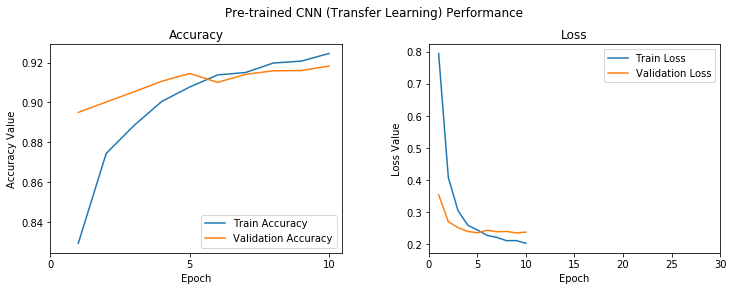

In [69]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
epoch_list = list(range(1,11))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 11, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")


ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# Save Weights

In [70]:

model_Struct = model.to_json()
file_name = Path("model_structure_transfer.json")
file_name.write_text(model_Struct)


model.save('TransferLearning.h5',overwrite= True)

In [ ]:
model.predict()